In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [3]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [4]:
values = values.loc[values["has_secondary_use"] == 1]
building_ids = values["building_id"]
values = values.iloc[:, 29:]
values["building_id"] = building_ids
values

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id
5,1,0,0,0,0,0,0,0,0,0,333020
20,1,0,0,0,0,0,0,0,0,0,793397
26,1,0,0,0,0,0,0,0,0,0,973909
45,0,0,1,0,0,0,0,0,0,0,440102
57,1,0,0,0,0,0,0,0,0,0,552720
...,...,...,...,...,...,...,...,...,...,...,...
260579,1,0,0,0,0,0,0,0,0,0,977263
260584,1,0,0,0,0,0,0,0,0,0,317439
260587,1,0,0,0,0,0,0,0,0,0,603159
260591,1,0,0,0,0,0,0,0,0,0,560805


Text(0, 0.5, 'Cantidad de construcciones danadas.')

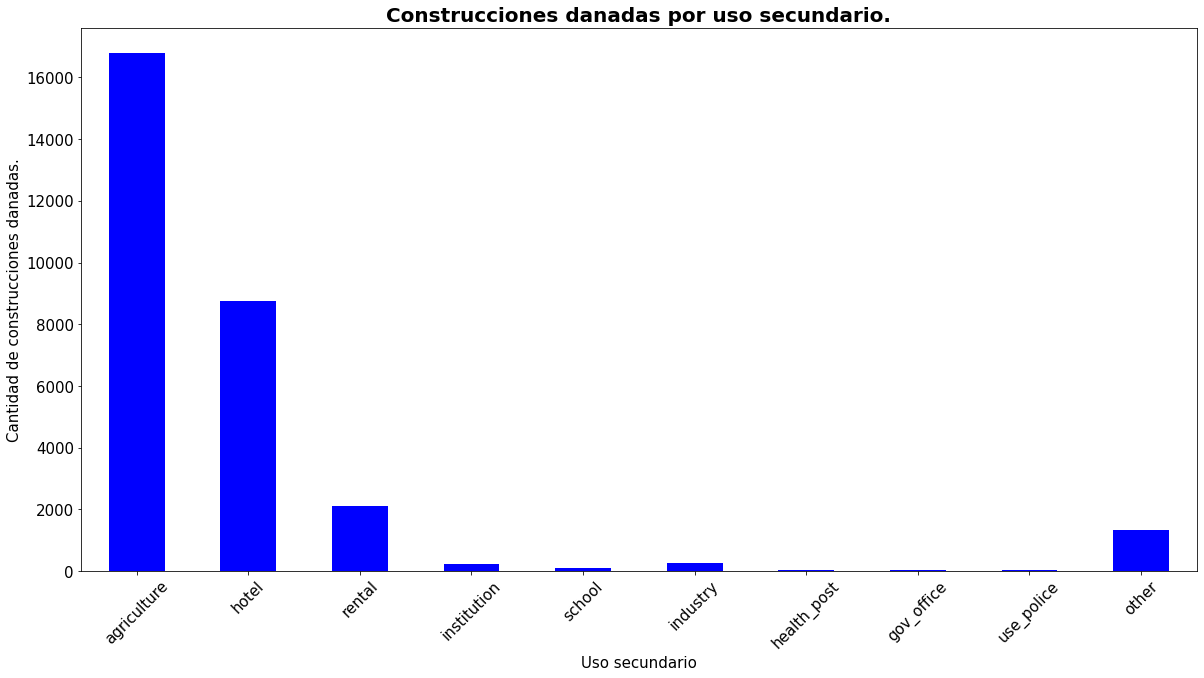

In [5]:
values_sum = values.iloc[:, :10].sum()
values_sum.index = [ind[18:] for ind in values_sum.index]
values_sum.plot(\
    kind="bar",\
    figsize=(20,10),\
    title = "Construcciones danadas por uso secundario.",\
    xlabel = "Uso secundario",\
    ylabel = "Cantidad de construcciones danadas.",\
    color = "blue",\
    rot = 45,\
    fontsize = 15)
plt.title("Construcciones danadas por uso secundario.",\
          fontsize =20, fontweight = 'bold')
plt.xlabel("Uso secundario", fontsize=15)
plt.ylabel("Cantidad de construcciones danadas.", fontsize=15)

In [6]:
merge_df = values.merge(labels, left_on="building_id", right_on="building_id")
merge_df

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,1,0,0,0,0,0,0,0,0,0,333020,2
1,1,0,0,0,0,0,0,0,0,0,793397,2
2,1,0,0,0,0,0,0,0,0,0,973909,2
3,0,0,1,0,0,0,0,0,0,0,440102,1
4,1,0,0,0,0,0,0,0,0,0,552720,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29151,1,0,0,0,0,0,0,0,0,0,977263,2
29152,1,0,0,0,0,0,0,0,0,0,317439,3
29153,1,0,0,0,0,0,0,0,0,0,603159,3
29154,1,0,0,0,0,0,0,0,0,0,560805,3


In [7]:
df = merge_df.groupby('damage_grade').sum().T.iloc[:10]
df

damage_grade,1,2,3
has_secondary_use_agriculture,829,10679,5269
has_secondary_use_hotel,2216,5058,1489
has_secondary_use_rental,877,1051,183
has_secondary_use_institution,99,129,17
has_secondary_use_school,30,47,17
has_secondary_use_industry,59,152,68
has_secondary_use_health_post,12,32,5
has_secondary_use_gov_office,13,21,4
has_secondary_use_use_police,4,12,7
has_secondary_use_other,175,852,307


Text(0, 0.5, 'Distribucion de grado de destruccion.')

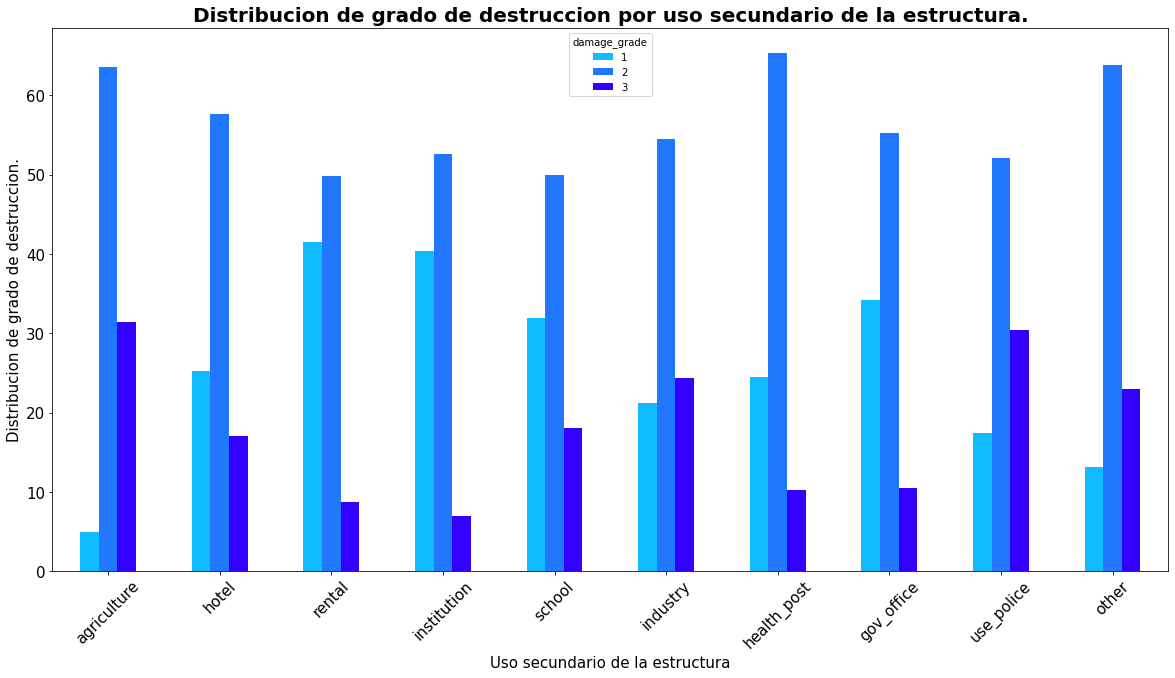

In [8]:
secondary_uses_list = df.index.to_list()
for s in secondary_uses_list:
    values = []
    for i in [1, 2, 3]:
        values.append(df.loc[s, i] / (df.loc[s, 1] + df.loc[s, 2] + df.loc[s, 3]) * 100) 
    df.loc[s] = values
df.index = [ind[18:] for ind in df.index]
df.plot(kind="bar",\
     figsize= (20, 10),\
     title = "Distribucion de grado de destruccion por uso secundario de la estructura.",\
     xlabel = "Uso secundario de la estructura.",\
     ylabel = "Distribucion de grado de destruccion.",\
     color = ["#11bbff", "#2277ff", "#3300ff"],\
     rot=45,\
     fontsize=15)
plt.title("Distribucion de grado de destruccion por uso secundario de la estructura.",\
          fontsize =20, fontweight = 'bold')
plt.xlabel("Uso secundario de la estructura", fontsize=15)
plt.ylabel("Distribucion de grado de destruccion.", fontsize=15)